In [2]:
import os,sys
from importlib import reload
import numpy as np
sys.path.append(r'C:\Softwares\Github')
%run "C:\Softwares\Github\ImageAnalysis3\required_files\Startup_py3.py"

In [3]:
import ImageAnalysis3 as ia3
from ImageAnalysis3 import *

print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

28292


In [4]:
fov_param = {'data_folder':r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230507-4T1_edits_22k',
             'save_folder':r'E:\Pu\Analysis\20230507-4T1_edits_22k',
             'experiment_type': 'DNA',
             'num_threads': 8,
             'correction_folder':r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# Process fov

In [6]:
_overwrite = False

_warp_image = True

_save_images = True
""
_fit_spots = True

bad_fov_ids = []

sel_fov_ids = np.arange(0,70) # batch 1
#sel_fov_ids = np.arange(3,70) # batch 1

for _fov_id in sel_fov_ids:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 1. Process dapi
    dapi_im = fov._load_dapi_image()
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)

    # 3. Process image into candidate spots
    fov.parallel = False
    setattr(fov, "relabeled_combo_ref_id", 0)
    fov._process_image_to_spots('relabeled_combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 3. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    #break

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 150
- Importing csv format color_usage file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230507-4T1_edits_22k\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
- 17 folders are found according to color-usage annotation.
+ loading fov_info from file: E:\Pu\Analysis\20230507-4T1_edits_22k\Conv_zscan_000.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im', 'relabeled_combo_ref_im', 'rna_ref_im'] in 2.687s.
+ loading correction from file: E:\Pu\Analysis\20230507-4T1_edits_22k\Conv_zscan_000.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: E:\Pu\Analysis\20230507-4T1_edits_22k\Conv_zscan_000.hdf5
++ base a

OSError: [WinError 87] The parameter is incorrect

In [87]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    combo_ims = list(_grp['ims'][:])


In [156]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('relabeled_combo')
    relabeled_combo_ims = list(_grp['ims'][:])


In [165]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('rna')
    rna_ims = list(_grp['ims'][:])


In [164]:
fov._load_from_file('rna')

+ loading rna from file: E:\Pu\Analysis\20230405-4T1_zombie_8x_batch2\Conv_zscan_03.hdf5
++ finish loading rna in 0.032s. 


In [157]:
fov._load_from_file('relabeled_combo')

+ loading relabeled_combo from file: E:\Pu\Analysis\20230405-4T1_zombie_8x_batch2\Conv_zscan_03.hdf5
++ finish loading relabeled_combo in 0.074s. 


In [88]:
fov._load_from_file('combo')

+ loading combo from file: E:\Pu\Analysis\20230405-4T1_zombie_8x_batch2\Conv_zscan_03.hdf5
++ finish loading combo in 0.011s. 


In [ ]:
len(combo_ims)

<IPython.core.display.Javascript object>


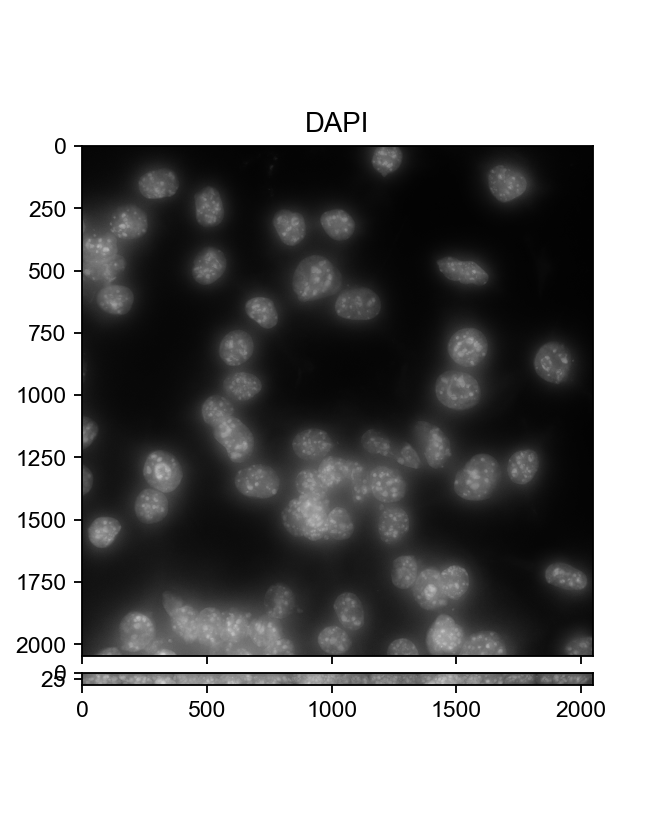

In [108]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([fov.dapi_im], image_names=['DAPI'])

<IPython.core.display.Javascript object>


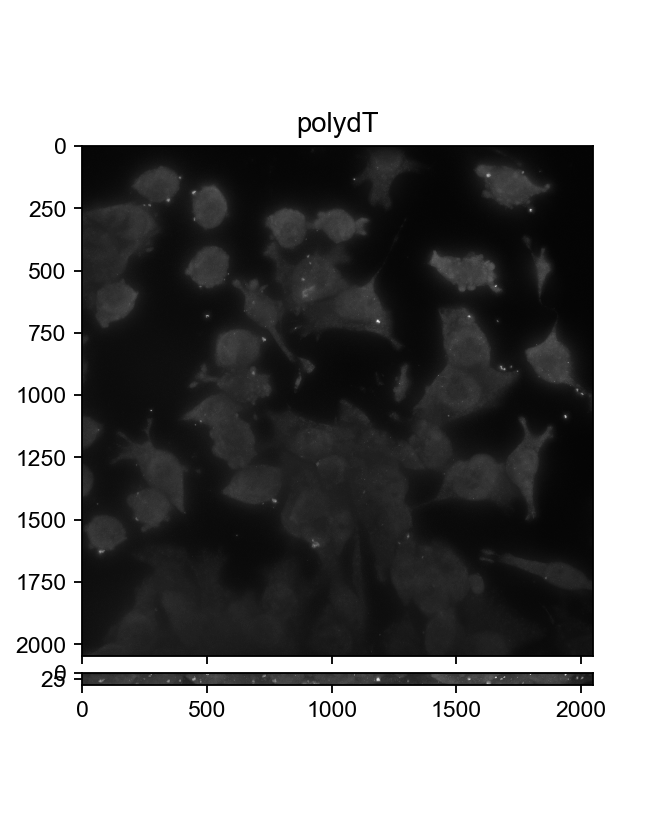

In [168]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(rna_ims, image_names=['polydT'])

<IPython.core.display.Javascript object>


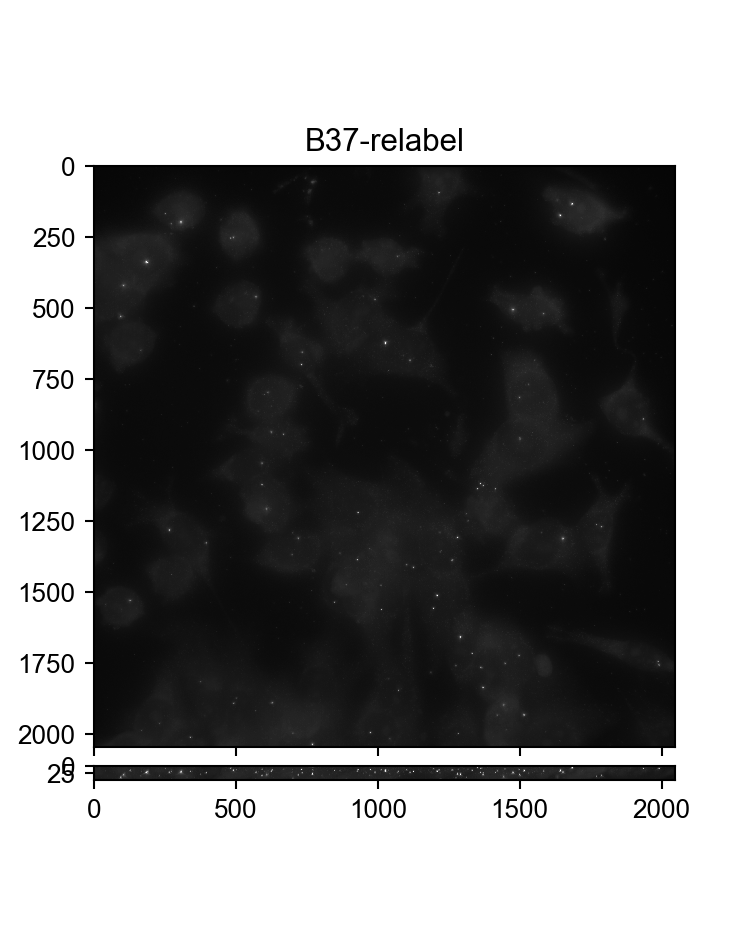

In [170]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(relabeled_combo_ims, 
                               image_names=[f"B{_id}-relabel" for _id in fov.relabeled_combo_ids])

<IPython.core.display.Javascript object>


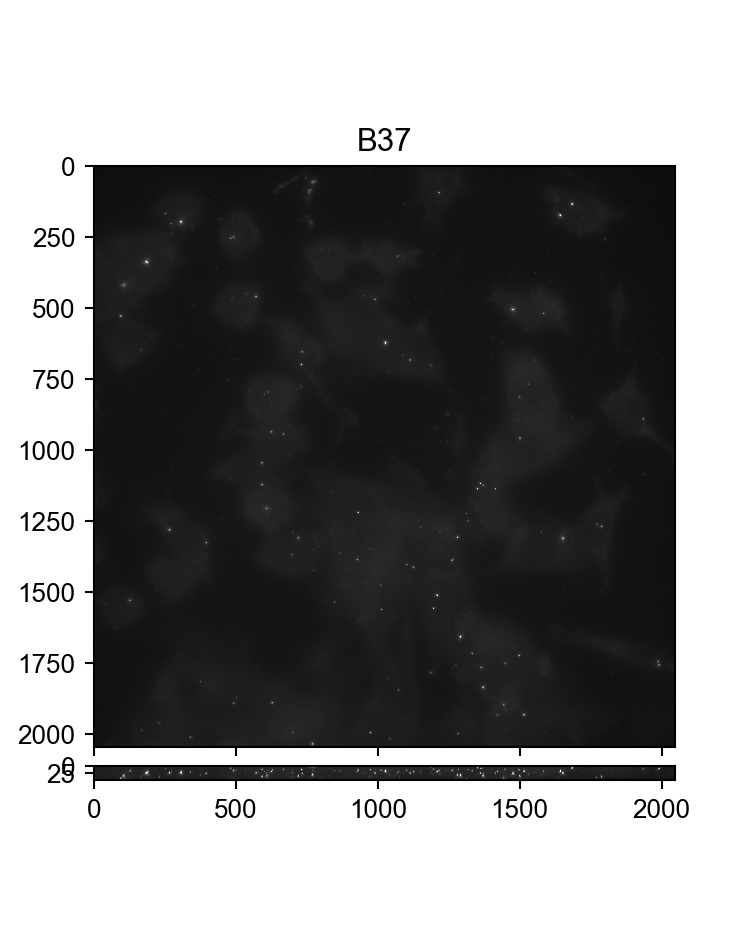

In [169]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(combo_ims, 
                               image_names=['common','']+[f"B{_id}" for _id in fov.combo_ids[1:]])

In [41]:

sel_int_th = 1000
sel_spots_list = [_spots[_spots[:,0] > sel_int_th] 
                  for _spots in fov.combo_spots_list]

In [92]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_spots_list):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))

In [93]:
len(coord_dict['coords'])

26467

<IPython.core.display.Javascript object>


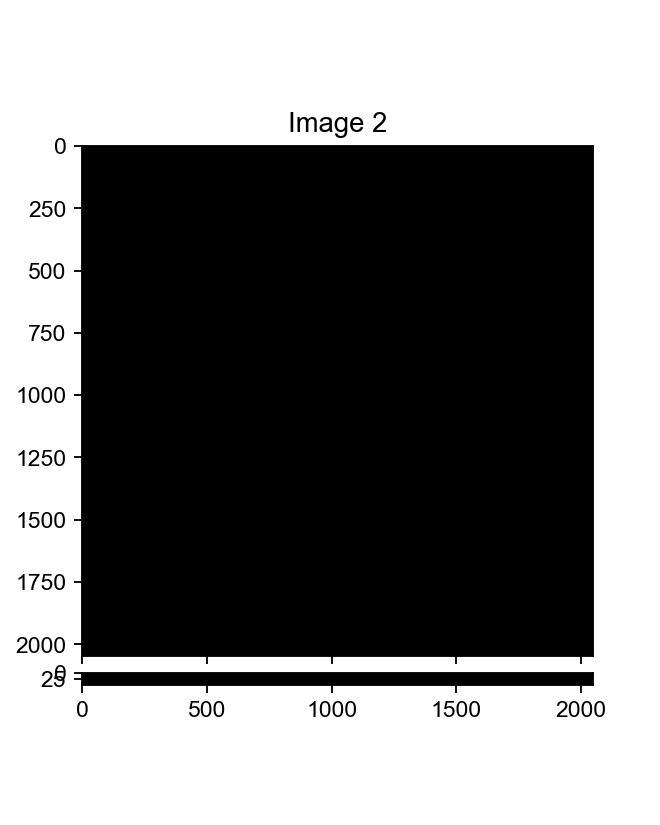

In [31]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(combo_ims)

<IPython.core.display.Javascript object>


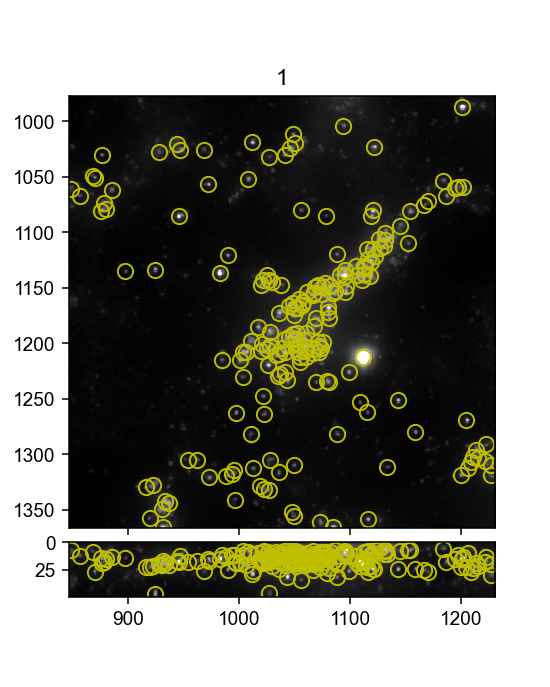

In [324]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(list(combo_ims) + [fov.dapi_im], 
                               given_dic=coord_dict, image_names=list(fov.combo_ids)+['dapi'])

In [30]:
max_combo_im = np.max(combo_ims[1:], 0)

In [32]:
mean_combo_im = np.mean(combo_ims[1:], 0)

<IPython.core.display.Javascript object>


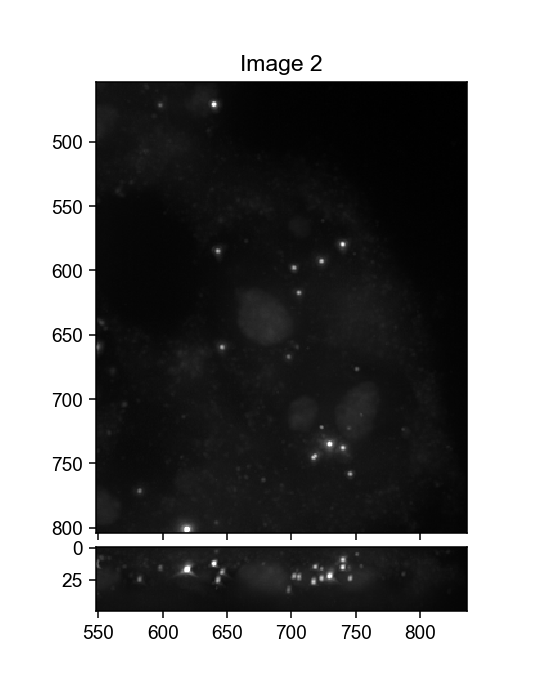

In [323]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, max_combo_im, mean_combo_im])

# Load codebook

In [42]:
import pandas as pd
codebook_filename = r'\\wi-bigdata.wi.mit.edu\solexa_weissman\puzheng\MERFISH_Probes\PE_TS\MF_PE_TS_agilentOrder_Codebook.xlsx'
codebook = pd.read_excel(codebook_filename)

In [43]:
from ImageAnalysis3.io_tools.crop import crop_neighboring_area
from ImageAnalysis3.classes.preprocess import Spots3D

In [44]:
encoded_spots = [Spots3D(_s) for _s in sel_spots_list[2:]]
encoded_ids = fov.combo_ids[2:]

In [45]:
# find spots that has at least two close neighbors
from scipy.spatial import KDTree
pixel_sizes = classes.default_pixel_sizes

_candidate_coords = np.concatenate([_s.to_coords() for _s in encoded_spots]) * pixel_sizes
_candidate_ids = np.concatenate([np.ones(len(_s))*_id for _s,_id in zip(encoded_spots, encoded_ids)])

In [46]:
search_th = 500
min_matched_neighbors = 3

_tree = KDTree(_candidate_coords)
neighbor_list = _tree.query_ball_point(_candidate_coords, search_th, )
# convert to id and exclude self
neighbor_id_list = [_candidate_ids[_n][_candidate_ids[_n]!=_id] for _id, _n in zip(_candidate_ids, neighbor_list)]

_sel_flags = np.array([len(_ni) >= min_matched_neighbors-1 for _ni in neighbor_id_list])

_sel_coords, _sel_ids = _candidate_coords[_sel_flags], _candidate_ids[_sel_flags]


In [47]:
_sel_ints = np.concatenate(encoded_spots)[_sel_flags,0]

In [48]:
test_coord_dict = {'coords':list(np.fliplr(_sel_coords/pixel_sizes)),
                                                         'class_ids':list(_sel_ids.astype(np.int32)-37)}

<IPython.core.display.Javascript object>


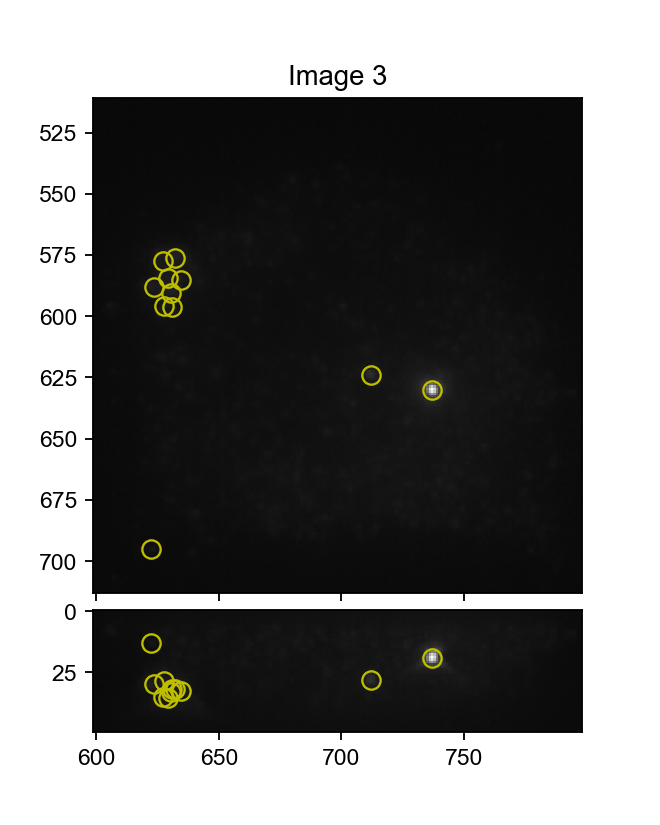

In [49]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(combo_ims[2:], given_dic=test_coord_dict)

In [111]:
_sel_ints[5614]

56807.832

In [123]:
# ims
cims_list = []
for _ind in np.argsort(_sel_ints)[::-1][:100]:
    _coord = _sel_coords[_ind]
    _cims = [crop_neighboring_area(_im, _coord/pixel_sizes, 7) for _im in combo_ims[1:]]
    cims_list.append(_cims)

<IPython.core.display.Javascript object>


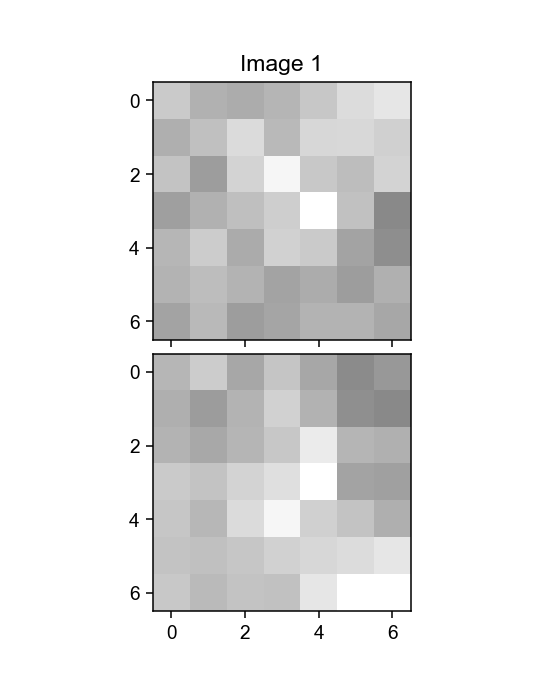

In [115]:
visual_tools.imshow_mark_3d_v2(_cims)

In [174]:
code_array = codebook.values[:,1:].astype(np.int32)

In [113]:
%matplotlib inline

_sel_cims = cims_list[6]

fig, axes = plt.subplots(1,21, figsize=(21,1),)

for _ax, _im in zip(axes, _sel_cims):
    _ax.imshow(np.max(_im, 0), 
               vmin=np.min(_im), vmax=np.min(_im)+30000, 
               cmap='gray')

NameError: name 'cims_list' is not defined

In [303]:
# find the brightest:
_ref_im = _sel_cims[np.argmax([np.max(_c) for _c in _sel_cims])]
# calculate correlation
_corrs = np.array([np.corrcoef(np.ravel(_ref_im), np.ravel(_c))[1,0] for _c in _sel_cims])

In [312]:
vec = np.array([2*np.max(_c)/(np.min(_c)+np.median(_c))-1 for _c in _sel_cims])
vec_code = np.array((vec > 1) & (_corrs > 0.75), dtype=np.int32)
#vec_code = vec / np.max(vec)

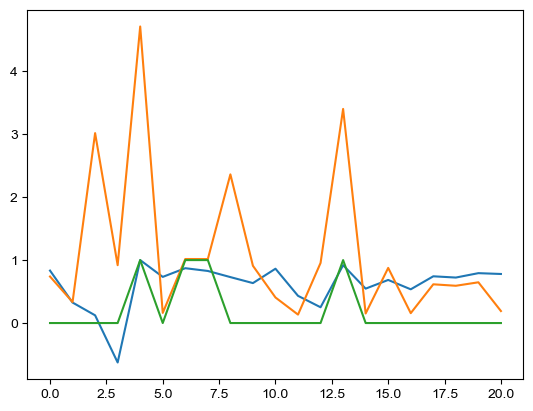

In [313]:
plt.plot(_corrs)
plt.plot(vec)
plt.plot(vec_code)

In [314]:
vec_code

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [307]:
from scipy.spatial.distance import cdist

In [318]:
vec_dict = cdist([vec_code], code_array)[0]**2

In [319]:
np.sort(vec_dict)

array([ 2.,  2.,  2., ..., 10., 10., 10.])

In [320]:
np.argmin(vec_dict)

242

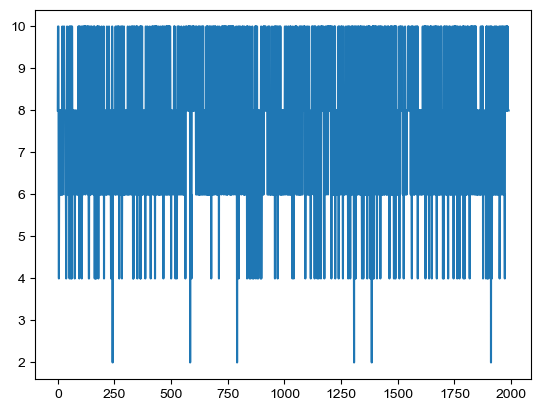

In [321]:
plt.plot(vec_dict)

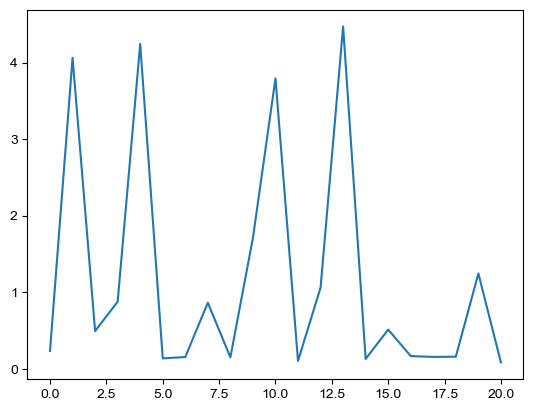

In [258]:
plt.figure()
plt.plot(vec)

In [102]:
neighbor_id_list

[array([38., 39., 40., 41., 41., 41., 42., 43., 44., 46., 47., 49., 50.,
        51., 52., 53., 54., 55., 56.]),
 array([38., 40., 41., 45., 46., 49., 50., 52., 56.]),
 array([38., 40., 41., 43., 46., 47., 48., 49., 50., 56., 57.]),
 array([39., 40., 41., 42., 43., 44., 45., 46., 47., 49., 50., 51., 52.,
        53., 54., 56., 57.]),
 array([40., 41., 43., 50., 56.]),
 array([38., 39., 40., 41., 43., 44., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 56., 57.]),
 array([38., 39., 40., 40., 41., 42., 43., 44., 47., 47., 49., 50., 52.,
        54., 55., 56., 57.]),
 array([40., 42., 44., 44., 47., 50., 52., 53., 56.]),
 array([38., 39., 41., 42., 43., 44., 47., 49., 50., 52., 53., 54., 56.]),
 array([38., 39., 41., 43., 44., 46., 47., 49., 50., 52., 53., 56., 57.]),
 array([38., 40., 41., 44., 47., 48., 49., 52., 56., 57.]),
 array([41., 44., 56.]),
 array([39., 41., 42., 43., 44., 45., 47., 49., 52., 54., 56., 57.]),
 array([40., 41., 43., 44., 47., 49., 56., 57.]),
 array([38., 

In [60]:
neighbor_id_list

[array([37., 39., 41., 46., 47., 50.]),
 array([37., 40., 41., 45., 56.]),
 array([37., 40., 41., 47., 48.]),
 array([37., 40., 41., 42., 44., 47., 49., 51., 52., 53., 54., 56., 57.]),
 array([37., 40.]),
 array([37., 38., 41., 43., 44., 46., 47., 49., 52., 53., 54., 56.]),
 array([37., 38., 40., 42., 43., 44., 47., 49., 50., 52., 54., 56.]),
 array([37., 40., 42., 44., 47., 50., 52., 53., 56.]),
 array([37., 41., 44., 47., 50.]),
 array([37., 38., 41., 43., 44., 47., 49., 50., 52., 56.]),
 array([37., 40., 41., 44., 49.]),
 array([37., 41.]),
 array([37., 41., 44., 45., 47., 49., 54., 56.]),
 array([37., 40., 41., 43., 44., 47., 56.]),
 array([37., 38., 40., 41., 48., 49., 56.]),
 array([37., 41., 44.]),
 array([37., 41., 44., 46., 47., 49., 52., 56.]),
 array([37., 38., 41., 44., 52.]),
 array([37., 38., 41., 43., 44., 47., 48., 49., 50., 54., 56.]),
 array([37.]),
 array([37., 39., 41., 44., 53.]),
 array([37., 38., 41., 43., 44., 49.]),
 array([37., 38., 39., 40., 41., 42., 44., 47

In [55]:
len(results)

8368

In [52]:
_tree.query_ball_point?

In [36]:
codebook

,Name,bit-37_RS1326,bit-38_RS1334,bit-39_RS1404,bit-40_RS1470,bit-41_RS1496,bit-42_RS1520,bit-43_RS1641,bit-44_RS1678,bit-45_RS1719,...,bit-48_RS2179,bit-49_RS2184,bit-50_RS2211,bit-51_RS2232,bit-52_RS2274,bit-53_RS2283,bit-54_RS2285,bit-55_RS2287,bit-56_RS2288,bit-57_RS2299
0,MF_PE_TS_IntBC1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,1,0,0,0,0,0
1,MF_PE_TS_IntBC2,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,MF_PE_TS_IntBC3,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,MF_PE_TS_IntBC4,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,MF_PE_TS_IntBC5,0,1,0,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,MF_PE_TS_IntBC1986,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
1986,MF_PE_TS_IntBC1987,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1987,MF_PE_TS_IntBC1988,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1988,MF_PE_TS_IntBC1989,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1


# Batch analysis

In [24]:
save_folder = fov_param['save_folder']
saved_files = [os.path.join(save_folder, _fl) 
               for _fl in os.listdir(save_folder) 
               if '.hdf5' in _fl]

In [50]:
# load spots
intensity_th = 1000
pixel_sizes = fov_param['shared_parameters']['distance_zxy']

combo_spots_list = []

for _fl in saved_files:
    with h5py.File(_fl, 'r') as _f:
        #print(_f.keys())
        _combo_spots = [ia3.classes.preprocess.Spots3D(_spots[_spots[:,0] >= intensity_th], pixel_sizes=pixel_sizes) 
                        for _spots in _f['combo/spots'][2:]]
        combo_spots_list.append(_combo_spots)
        

In [51]:
spots_by_bits = [ia3.classes.preprocess.Spots3D(np.concatenate([_spots[_i] for _spots in combo_spots_list])) 
                 for _i in range(len(_combo_spots))]

In [52]:
zscores_by_bits = [scipy.stats.zscore(_s.to_intensities()) for _s in spots_by_bits]
zscores_by_bits = [(_zs - np.min(_zs)) / (np.max(_zs) - np.min(_zs)) for _zs in zscores_by_bits]

fovid_by_bits = [np.concatenate([np.ones(len(_spots[_i]),dtype=np.int32) * _fov_id
                                                                for _fov_id, _spots in enumerate(combo_spots_list)]) 
                 for _i in range(len(_combo_spots))]

In [53]:
updated_combo_spots_list = [_cspots for _cspots in combo_spots_list]
for _bit, (_zscores, _fovids) in enumerate(zip(zscores_by_bits, fovid_by_bits)):
    for _fov_id in np.unique(_fovids):
        updated_combo_spots_list[_fov_id][_bit][:,0] = _zscores[_fovids==_fov_id]
    

## Search by KDTree

In [114]:
import pandas as pd
codebook_filename = r'\\wi-bigdata.wi.mit.edu\solexa_weissman\puzheng\MERFISH_Probes\PE_TS\MF_PE_TS_agilentOrder_Codebook.xlsx'
codebook = pd.read_excel(codebook_filename)

code_array = codebook.values[:,1:].astype(np.int32)

from ImageAnalysis3.io_tools.crop import crop_neighboring_area
from ImageAnalysis3.classes.preprocess import Spots3D


In [115]:
fov_id = fov.fov_id

encoded_spots = [Spots3D(_s) for _s in updated_combo_spots_list[fov_id]]
encoded_ids = fov.combo_ids[1:]
print(len(encoded_ids), len(encoded_spots))
# find spots that has at least two close neighbors
from scipy.spatial import KDTree
pixel_sizes = classes.default_pixel_sizes
_candidate_spots = np.concatenate(encoded_spots)
_candidate_coords = np.concatenate([_s.to_coords() for _s in encoded_spots]) * pixel_sizes
_candidate_ids = np.concatenate([np.ones(len(_s))*_id for _s,_id in zip(encoded_spots, encoded_ids)])

21 21


In [116]:
encoded_ids

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57])

In [117]:
search_th = 250
min_matched_neighbors = 3

_tree = KDTree(_candidate_coords)
neighbor_list = _tree.query_ball_point(_candidate_coords, search_th, )
# convert to id and exclude self
neighbor_id_list = [_candidate_ids[_n][_candidate_ids[_n]!=_id] for _id, _n in zip(_candidate_ids, neighbor_list)]

_sel_flags = np.array([len(_ni) >= min_matched_neighbors-1 for _ni in neighbor_id_list])

In [118]:
from scipy.spatial.distance import cdist
spot_min_dists = []
spot_dist_ratios = []

sel_top_ids = []

for _ids in neighbor_list[_sel_flags]:
    _rids = _candidate_ids[_ids].astype(np.int32)
    _sel_spots = _candidate_spots[_ids]
    # calculate vector 
    vec_code = np.zeros(21)
    vec_code[_rids-37] = _sel_spots[:,0]
    vec_code = (vec_code - np.min(vec_code)) / (np.max(vec_code) - np.min(vec_code))
    # find codebook match:
    vec_dists = cdist([vec_code], code_array)[0]**2
    min_dist, dist_ratio = np.min(vec_dists), np.mean(np.sort(vec_dists)[1:6]) / np.min(vec_dists)
    print(f"{min_dist:.2f}, {dist_ratio:.3f}")
    spot_min_dists.append(min_dist)
    spot_dist_ratios.append(dist_ratio)
    #save top
    if min_dist < 2 and dist_ratio > 1.1:
        sel_top_ids.append(_ids)

2.13, 1.269
1.83, 1.318
2.20, 1.279
2.46, 1.145
1.73, 1.577
0.42, 6.253
2.45, 1.085
1.73, 1.357
3.43, 1.000
2.25, 1.153
0.55, 4.844
1.86, 1.386
1.84, 1.363
1.79, 1.421
1.60, 1.793
0.85, 2.944
0.90, 2.593
1.48, 1.998
0.58, 4.498
1.91, 1.348
1.31, 1.791
0.78, 3.198
1.96, 1.308
2.82, 1.082
1.74, 1.400
2.33, 1.084
0.63, 4.190
0.66, 3.924
1.12, 2.177
0.58, 4.533
1.71, 1.348
2.23, 1.234
1.66, 1.471
2.11, 1.090
2.69, 1.174
1.37, 1.876
1.90, 1.229
2.83, 1.068
2.22, 1.157
2.20, 1.232
1.17, 2.025
2.05, 1.142
1.67, 1.373
1.25, 1.848
1.94, 1.329
2.78, 1.142
2.97, 1.058
1.62, 1.513
1.35, 1.806
1.59, 1.601
1.64, 1.523
1.95, 1.271
2.25, 1.245
2.76, 1.123
1.10, 2.306
2.32, 1.143
2.17, 1.208
2.15, 1.206
1.65, 1.271
1.81, 1.408
2.98, 1.090
1.70, 1.461
2.09, 1.324
2.21, 1.144
1.83, 1.310
2.52, 1.136
2.26, 1.213
2.35, 1.083
2.00, 1.343
2.14, 1.229
2.31, 1.133
2.09, 1.301
2.65, 1.121
1.59, 1.618
1.42, 1.669
1.96, 1.143
3.05, 1.102
1.82, 1.370
1.94, 1.203
2.23, 1.200
1.26, 1.962
0.63, 4.189
1.84, 1.377
2.12

2.45, 1.085
2.68, 1.191
1.71, 1.324
2.16, 1.194
2.47, 1.135
2.20, 1.151
1.66, 1.589
2.04, 1.322
2.67, 1.076
3.76, 1.000
2.35, 1.268
3.39, 1.000
2.81, 1.091
2.79, 1.000
2.41, 1.077
2.46, 1.121
4.39, 1.000
2.23, 1.128
3.94, 1.000
1.95, 1.271
1.93, 1.264
3.07, 1.000
1.69, 1.348
0.65, 4.035
3.32, 1.002
1.79, 1.241
1.87, 1.330
3.03, 1.063
2.29, 1.167
1.96, 1.188
3.65, 1.000
3.05, 1.102
3.16, 1.000
1.83, 1.310
2.53, 1.106
1.91, 1.355
1.71, 1.348
1.54, 1.405
4.29, 1.000
1.36, 1.890
2.15, 1.206
2.96, 1.000
1.97, 1.179
4.19, 1.020
2.17, 1.210
1.94, 1.369
3.22, 1.027
2.41, 1.144
1.59, 1.601
2.33, 1.104
3.37, 1.000
3.59, 1.000
2.09, 1.301
1.93, 1.301
2.20, 1.258
2.77, 1.000
2.76, 1.114
2.48, 1.181
2.59, 1.082
2.75, 1.156
2.92, 1.123
4.11, 1.000
2.00, 1.343
4.35, 1.005
2.20, 1.089
2.31, 1.133
0.63, 4.190
3.80, 1.027
3.69, 1.000
2.18, 1.195
4.11, 1.007
3.74, 1.000
2.28, 1.092
1.10, 2.306
4.82, 1.000
3.40, 1.000
3.31, 1.000
2.33, 1.256
3.26, 1.061
3.61, 1.000
1.81, 1.408
3.53, 1.019
3.28, 1.066
2.45

2.44, 1.000
3.81, 1.007
4.03, 1.000
3.79, 1.000
3.60, 1.000
3.27, 1.000
3.37, 1.024
2.81, 1.090
3.22, 1.000
3.14, 1.092
3.13, 1.000
4.48, 1.000
3.65, 1.000
2.55, 1.180
2.18, 1.257
3.89, 1.000
3.05, 1.000
2.86, 1.000
3.82, 1.000
4.32, 1.000
3.54, 1.000
1.38, 1.803
2.99, 1.024
3.89, 1.000
3.74, 1.000
3.01, 1.000
4.18, 1.000
3.90, 1.000
3.97, 1.000
3.63, 1.044
2.73, 1.038
3.99, 1.000
3.40, 1.000
2.28, 1.076
0.42, 6.253
1.87, 1.331
2.81, 1.101
0.90, 2.593
2.55, 1.094
1.73, 1.357
0.78, 3.198
0.58, 4.498
2.35, 1.151
2.32, 1.159
0.55, 4.844
0.38, 7.272
2.05, 1.132
1.36, 1.890
0.58, 4.538
0.85, 2.944
2.34, 1.109
1.98, 1.315
2.97, 1.034
2.25, 1.166
2.64, 1.050
1.38, 1.803
0.63, 4.190
0.65, 4.035
2.16, 1.186
1.94, 1.338
1.86, 1.386
2.28, 1.157
2.29, 1.254
2.13, 1.091
2.59, 1.117
1.74, 1.401
1.85, 1.241
2.33, 1.239
2.20, 1.089
2.98, 1.104
1.59, 1.601
2.81, 1.091
3.15, 1.083
1.12, 2.177
1.29, 1.898
2.17, 1.208
1.43, 1.614
1.69, 1.353
3.00, 1.087
1.82, 1.312
1.93, 1.264
2.22, 1.157
3.54, 1.000
1.10

1.43, 1.614
2.04, 1.139
3.05, 1.102
1.31, 1.789
2.05, 1.184
1.87, 1.331
0.58, 4.533
2.41, 1.022
1.60, 1.793
2.73, 1.071
2.11, 1.166
1.94, 1.338
1.74, 1.400
1.95, 1.264
2.83, 1.068
1.83, 1.310
1.83, 1.318
0.63, 4.190
2.38, 1.183
0.66, 3.924
2.42, 1.126
1.10, 2.306
2.36, 1.218
1.94, 1.215
1.66, 1.471
1.89, 1.245
1.62, 1.513
2.65, 1.059
2.88, 1.020
2.93, 1.052
1.70, 1.461
1.90, 1.415
1.88, 1.362
2.70, 1.030
2.75, 1.137
1.80, 1.158
1.12, 2.177
1.95, 1.271
2.25, 1.245
2.61, 1.104
2.25, 1.164
1.79, 1.421
1.17, 2.025
2.46, 1.164
3.01, 1.014
2.50, 1.116
1.59, 1.601
2.90, 1.008
2.08, 1.175
2.20, 1.089
2.12, 1.300
1.65, 1.371
1.68, 1.540
2.30, 1.166
1.54, 1.405
1.71, 1.348
2.41, 1.129
1.84, 1.363
2.36, 1.092
1.59, 1.618
2.34, 1.116
2.83, 1.069
3.71, 1.000
3.34, 1.000
2.00, 1.343
2.04, 1.202
2.35, 1.118
2.28, 1.181
1.70, 1.452
2.20, 1.279
1.96, 1.369
1.67, 1.379
1.48, 1.650
1.56, 1.695
1.42, 1.669
2.33, 1.239
1.50, 1.641
1.91, 1.395
1.49, 1.957
1.93, 1.264
2.14, 1.245
2.49, 1.134
2.05, 1.269
2.46

2.41, 1.022
0.90, 2.593
0.58, 4.498
2.17, 1.090
2.16, 1.186
1.37, 1.729
2.77, 1.048
0.63, 4.190
2.45, 1.142
0.78, 3.198
2.17, 1.208
2.86, 1.039
2.33, 1.151
0.85, 2.944
2.15, 1.206
2.54, 1.122
0.66, 3.924
2.12, 1.273
1.60, 1.793
1.96, 1.308
0.58, 4.533
1.37, 1.876
2.25, 1.122
0.40, 6.864
2.65, 1.059
2.67, 1.107
1.81, 1.408
2.26, 1.213
2.20, 1.258
1.88, 1.291
2.25, 1.153
1.59, 1.601
1.43, 1.614
2.36, 1.092
1.42, 1.669
2.33, 1.239
1.75, 1.441
1.70, 1.452
1.93, 1.264
2.57, 1.128
2.50, 1.241
1.17, 2.025
1.71, 1.324
2.70, 1.030
1.72, 1.485
2.42, 1.126
2.90, 1.008
1.62, 1.513
2.75, 1.016
1.97, 1.314
2.83, 1.068
2.09, 1.301
1.68, 1.540
1.10, 2.306
2.46, 1.164
1.12, 2.177
2.09, 1.244
4.10, 1.003
2.13, 1.091
2.21, 1.220
2.23, 1.040
2.19, 1.094
2.49, 1.134
2.77, 1.019
3.46, 1.048
2.35, 1.083
1.92, 1.265
2.22, 1.157
2.26, 1.224
1.87, 1.327
2.51, 1.067
3.28, 1.094
2.30, 1.177
2.14, 1.229
1.59, 1.618
2.19, 1.090
2.01, 1.142
2.31, 1.133
1.48, 1.998
3.51, 1.035
2.36, 1.218
3.54, 1.000
2.82, 1.161
2.76

1.88, 1.362
2.96, 1.000
4.50, 1.000
2.17, 1.141
2.92, 1.053
3.10, 1.101
3.75, 1.003
3.04, 1.098
1.68, 1.587
2.55, 1.092
2.76, 1.123
3.28, 1.000
1.84, 1.260
1.65, 1.614
1.93, 1.142
2.79, 1.209
2.18, 1.288
4.55, 1.000
3.37, 1.024
2.36, 1.128
3.39, 1.000
2.46, 1.156
4.41, 1.000
2.14, 1.137
4.41, 1.000
3.71, 1.000
4.68, 1.000
4.09, 1.000
4.47, 1.000
1.91, 1.355
1.96, 1.308
3.28, 1.000
4.36, 1.000
3.25, 1.009
3.32, 1.073
3.76, 1.000
2.76, 1.000
3.24, 1.044
3.08, 1.030
1.87, 1.331
1.94, 1.216
2.74, 1.036
2.12, 1.273
1.94, 1.338
1.73, 1.577
1.71, 1.348
2.33, 1.084
2.30, 1.166
1.78, 1.242
1.84, 1.363
2.39, 1.086
3.75, 1.065
1.55, 1.427
3.03, 1.031
1.95, 1.273
2.86, 1.039
1.68, 1.272
1.75, 1.441
2.06, 1.244
1.64, 1.524
1.51, 1.480
2.20, 1.258
1.35, 1.806
2.20, 1.232
2.38, 1.082
2.22, 1.144
2.08, 1.266
2.19, 1.094
3.30, 1.047
1.25, 1.848
2.98, 1.038
2.20, 1.129
1.29, 1.831
1.94, 1.203
1.60, 1.511
1.72, 1.221
2.82, 1.066
1.24, 2.117
1.69, 1.348
2.31, 1.085
2.52, 1.136
3.46, 1.000
4.01, 1.000
3.22

2.18, 1.148
1.72, 1.221
2.47, 1.128
0.63, 4.190
3.50, 1.000
2.23, 1.178
2.74, 1.042
3.22, 1.045
3.28, 1.094
3.19, 1.000
4.00, 1.000
0.58, 4.533
2.16, 1.215
3.07, 1.058
2.42, 1.053
2.93, 1.099
2.88, 1.046
2.58, 1.067
2.77, 1.167
1.91, 1.239
1.39, 1.704
2.35, 1.230
2.65, 1.142
3.10, 1.101
2.92, 1.016
2.20, 1.089
2.25, 1.245
2.65, 1.083
2.20, 1.139
2.35, 1.118
1.24, 1.938
2.98, 1.090
2.35, 1.151
2.76, 1.114
1.63, 1.401
3.34, 1.069
1.75, 1.441
2.64, 1.137
2.17, 1.208
2.87, 1.111
2.38, 1.000
3.17, 1.016
1.95, 1.264
1.38, 1.803
1.50, 1.641
2.93, 1.150
1.60, 1.793
1.84, 1.418
1.93, 1.264
1.54, 1.405
3.38, 1.000
2.25, 1.122
2.13, 1.241
4.38, 1.000
2.73, 1.038
2.97, 1.048
2.13, 1.313
0.58, 4.498
4.87, 1.000
2.67, 1.076
2.51, 1.067
2.73, 1.058
1.86, 1.386
1.64, 1.352
1.73, 1.513
1.40, 1.556
3.24, 1.000
2.64, 1.050
2.12, 1.220
3.26, 1.014
2.38, 1.183
2.40, 1.166
3.67, 1.016
3.52, 1.003
2.38, 1.174
2.65, 1.121
2.13, 1.203
2.26, 1.199
3.25, 1.000
2.28, 1.092
1.76, 1.412
2.47, 1.049
2.54, 1.156
2.19

2.26, 1.213
2.28, 1.081
2.25, 1.245
2.09, 1.301
2.15, 1.206
1.44, 1.575
1.70, 1.461
1.96, 1.143
3.39, 1.004
1.56, 1.695
2.65, 1.059
1.12, 2.177
2.18, 1.195
1.17, 2.025
3.48, 1.011
4.74, 1.000
2.78, 1.142
2.59, 1.108
1.35, 1.806
2.68, 1.080
2.40, 1.063
1.87, 1.351
3.34, 1.069
1.71, 1.324
2.22, 1.212
2.97, 1.063
1.59, 1.618
1.48, 1.650
4.48, 1.010
1.39, 1.704
1.59, 1.601
1.26, 1.962
2.03, 1.235
3.14, 1.013
1.41, 1.695
1.51, 1.489
4.54, 1.018
1.66, 1.568
0.63, 4.275
2.11, 1.166
3.26, 1.056
2.10, 1.297
1.67, 1.543
2.68, 1.171
2.13, 1.091
2.71, 1.094
3.64, 1.000
4.60, 1.015
3.20, 1.022
2.48, 1.105
2.00, 1.343
3.33, 1.043
4.44, 1.017
3.00, 1.078
2.55, 1.157
2.03, 1.167
1.51, 1.480
3.69, 1.000
1.99, 1.288
2.18, 1.257
3.24, 1.062
1.69, 1.348
1.79, 1.199
4.34, 1.035
2.10, 1.229
2.35, 1.086
4.41, 1.000
2.34, 1.241
2.99, 1.154
2.88, 1.050
1.99, 1.199
4.16, 1.000
2.21, 1.131
2.04, 1.213
1.92, 1.265
2.45, 1.130
4.35, 1.000
1.72, 1.485
2.23, 1.186
2.11, 1.264
1.40, 1.556
3.60, 1.018
2.81, 1.075
2.71

In [119]:
sel_top_ids = np.unique(np.concatenate(sel_top_ids))

In [120]:
top_rids = _candidate_ids[sel_top_ids]
top_coords = _candidate_coords[sel_top_ids]

In [121]:
top_rids

array([37., 37., 37., ..., 57., 57., 57.])

<IPython.core.display.Javascript object>


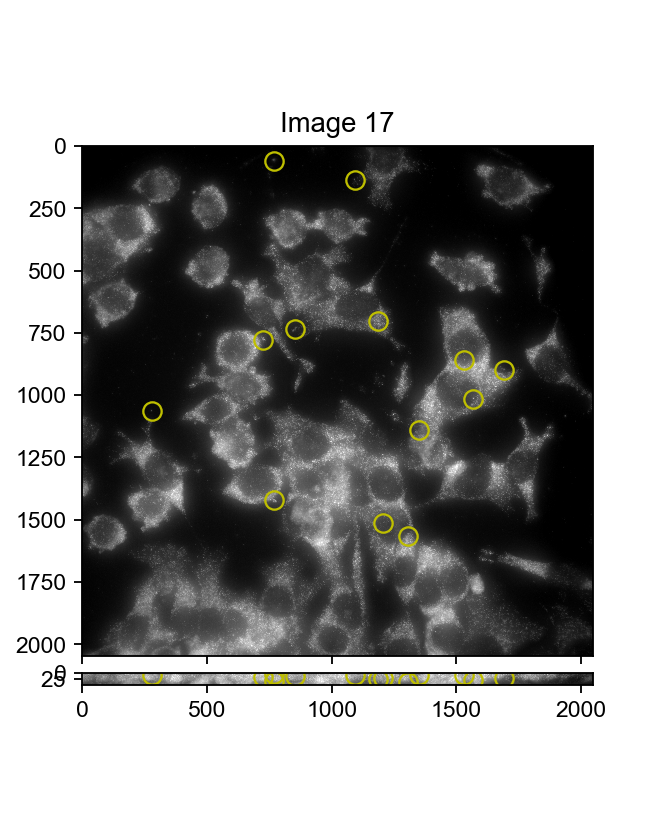

In [122]:
%matplotlib notebook
test_coord_dict = {'coords':list(np.fliplr(top_coords/pixel_sizes)),
                                                         'class_ids':list(top_rids.astype(np.int32)-37)}
visual_tools.imshow_mark_3d_v2(combo_ims[2:], given_dic=test_coord_dict)

In [130]:
top_rids

array([37., 37., 37., ..., 57., 57., 57.])

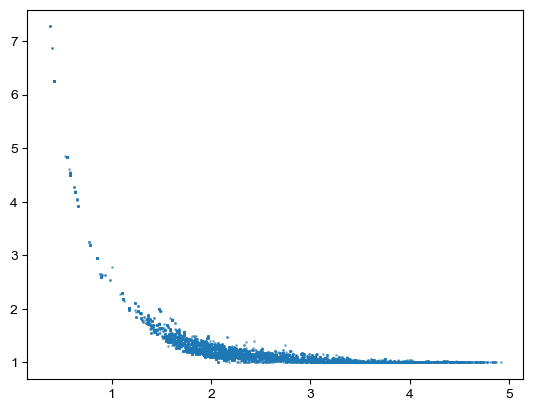

In [131]:
plt.figure()
plt.scatter(spot_min_dists, spot_dist_ratios, s=1, alpha=0.5 )

In [153]:
sel_index = 1
_ids = neighbor_list[_sel_flags][sel_index]

_rids = _candidate_ids[_ids].astype(np.int32)
_sel_spots = _candidate_spots[_ids]
# calculate vector 
vec_code = np.zeros(21)
vec_code[_rids-37] = _sel_spots[:,0]
vec_code = (vec_code - np.min(vec_code)) / (np.max(vec_code) - np.min(vec_code))

Text(0, 0.5, 'Hamming Dist.')

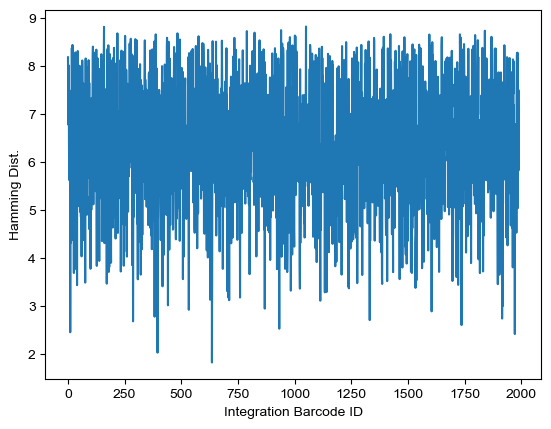

In [154]:
from scipy.spatial.distance import cdist
vec_dict = cdist([vec_code], code_array)[0]**2
plt.figure()
plt.plot(vec_dict)
plt.xlabel("Integration Barcode ID")
plt.ylabel("Hamming Dist.")

In [136]:
_sel_ints.shape

(7135,)

In [132]:
_sel_ints = np.concatenate(encoded_spots)[_sel_flags,0]

In [137]:
_sel_coords, _sel_ids = _candidate_coords[_sel_flags], _candidate_ids[_sel_flags]


In [138]:
len(_sel_coords)

7135

In [139]:
# ims
cims_list = []
for _ind in np.argsort(_sel_ints)[::-1][:100]:
    _coord = _sel_coords[_ind]
    _cims = [crop_neighboring_area(_im, _coord/pixel_sizes, 7) for _im in combo_ims[1:]]
    cims_list.append(_cims)

In [140]:
vec_code

array([0.        , 1.        , 0.15207574, 0.17982303, 0.71083208,
       0.        , 0.10491708, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02499669, 0.        , 0.        , 0.        , 0.        ,
       0.00164463])

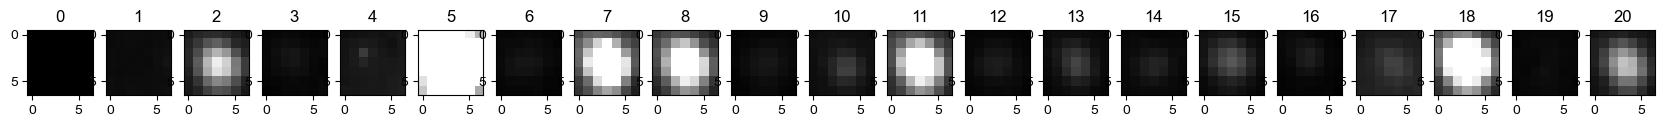

In [152]:
%matplotlib inline

_sel_cims = cims_list[1]

fig, axes = plt.subplots(1,21, figsize=(21,1),)

for _i, (_ax, _im) in enumerate(zip(axes, _sel_cims)):
    _ax.imshow(np.max(_im, 0), 
               vmin=np.min(_im), vmax=np.min(_im)+15000, 
               cmap='gray')
    _ax.set_title(f"{_i}")

<IPython.core.display.Javascript object>


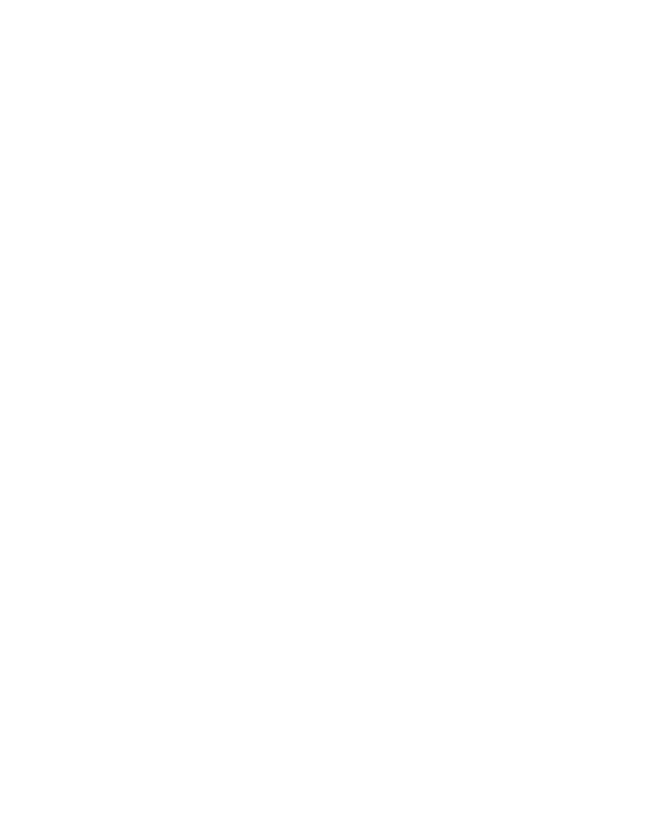

In [102]:
%matplotlib notebook
test_coord_dict = {'coords':list(np.fliplr(_sel_coords/pixel_sizes)),
                                                         'class_ids':list(_sel_ids.astype(np.int32)-37)}
visual_tools.imshow_mark_3d_v2(combo_ims[1:], given_dic=test_coord_dict)

In [ ]:
vec_code

In [ ]:
#